In [47]:
!pip install yellowbrick

# Load Libraries

In [5]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#cluster evaluation
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Data Generation

(100, 2)


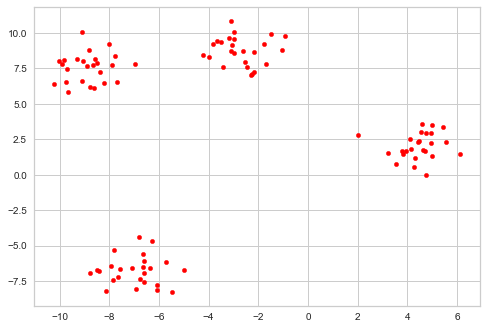

In [6]:
# Importing the dataset
#data, y = make_moons(200, noise=.05, random_state=0)
from sklearn.datasets.samples_generator import make_blobs
data, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=42)
print(data.shape)

# Getting the values and plotting it
X = np.array(list(zip(data[:, 0], data[:, 1])))
plt.scatter(X[:, 0], X[:, 1], c='red', s=20)


## Building the model

In [22]:
# Build the model here

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

# for centers in kmeans.cluster_centers_:
#     plt.scatter(centers[0], centers[1], c='r')
    

[1 2 3 2 1 2 0 0 0 3 3 2 2 0 3 1 1 0 1 1 3 1 1 0 0 3 0 1 1 2 2 0 2 1 3 3 3
 3 0 0 1 0 2 3 3 2 2 1 1 0 0 0 0 2 1 1 3 3 0 3 2 0 1 2 1 1 2 1 0 2 0 2 1 3
 2 1 2 1 2 2 0 2 3 1 3 3 3 2 3 0 0 2 3 2 3 3 3 0 1 0]
[[ 4.44441765  2.02122148]
 [-8.8546122   7.54808242]
 [-6.9749469  -6.76471966]
 [-2.69827251  8.74341951]]


# Plotting

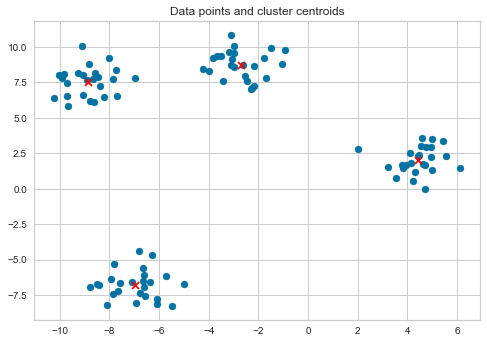

In [16]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

# Predicting

In [61]:
# Let's predict the cluster indexes for some inout dataet

print('predicted values', kmeans.predict([[12, 3]]))









predicted values [0]


# Cluster evaluation: the silhouette score

In [ ]:
# Calculate silhouette_score
#silhouette: mean ratio of intra-cluster and nearest-cluster distance

print(silhouette_score(X, kmeans.labels_))

# Using silhouette coefficients to determine K

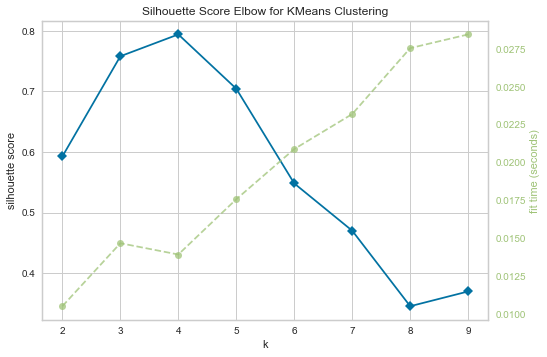

In [44]:
# Instantiate a scikit-learn K-Means model

model = KMeans(random_state=0)

# silhouette: mean ratio of intra-cluster and nearest-cluster distance
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=True)

# fit the data and visualize
visualizer.fit(X)
visualizer.poof()

# the plot shows that 4 clusters will fit the best and as number of cluster exceeds 4,
# it starts taking much longer to converge


# Using distortion to determine K

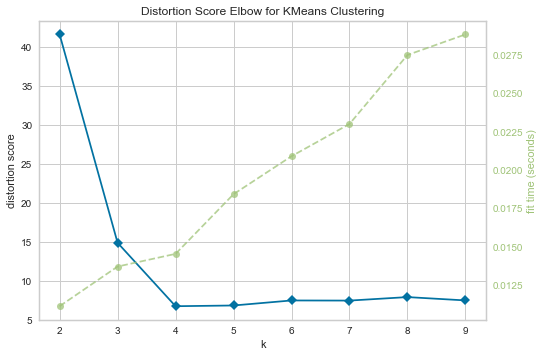

In [50]:
# Use distortion method

model = KMeans(random_state=0)

# silhouette: mean ratio of intra-cluster and nearest-cluster distance
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=True)

# fit the data and visualize
visualizer.fit(X)
visualizer.poof()

# want to find where distortion metric stops changing by large quantities
# the plot shows that after 4 the distortion is lowest and it begins to take much longer to converge




# Reference

1) https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

3) https://www.scikit-yb.org/en/latest/api/cluster/elbow.html